# Trader Behavior vs Market Sentiment Analysis

## Objective
This project explores the relationship between Bitcoin market sentiment (Fear & Greed Index) and trader performance using historical trading data from Hyperliquid.

The goal is to uncover how market psychology influences:
- Trader profitability
- Win rates
- Risk exposure (trade size)
- BUY vs SELL behavior

The insights aim to support smarter, sentiment-aware trading strategies in Web3 markets.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Setup complete")


Setup complete


In [5]:
import pandas as pd

# Load datasets
sentiment = pd.read_csv("/content/fear_greed_index.csv")
trades = pd.read_csv("/content/historical_data.csv")

# Preview
sentiment.head(), trades.head()

(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

## Datasets Used

### 1. Bitcoin Market Sentiment (Fear & Greed Index)
- Date
- Classification (Extreme Fear, Fear, Neutral, Greed, Extreme Greed)

This dataset represents overall market psychology on a daily basis.

### 2. Historical Trader Data (Hyperliquid)
Key columns used:
- Account
- Coin
- Side (BUY / SELL)
- Closed PnL
- Size USD
- Fee
- Timestamp

This dataset captures individual trade behavior and outcomes.


In [6]:
print("Sentiment data shape:", sentiment.shape)
print("Trader data shape:", trades.shape)

Sentiment data shape: (2644, 4)
Trader data shape: (211224, 16)


In [7]:
print("Sentiment columns:")
print(sentiment.columns)

print("\nTrader columns:")
print(trades.columns)

Sentiment columns:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

Trader columns:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


## Data Preparation & Cleaning

Steps performed:
- Converted timestamps to datetime format
- Extracted date from trade timestamps
- Aligned trader data with daily market sentiment
- Removed trades without valid sentiment or PnL
- Selected only relevant columns for analysis

Final analysis dataset contains only clean, sentiment-aligned trades.


In [8]:
# Convert sentiment date
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

sentiment[['date', 'classification']].head()

,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [10]:
# Convert trader timestamp
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    errors='coerce'
)

# Check how many failed
trades['Timestamp IST'].isna().sum()

np.int64(131999)

In [11]:
trades = trades.dropna(subset=['Timestamp IST'])

In [12]:
trades['date'] = trades['Timestamp IST'].dt.date

trades[['Timestamp IST', 'date']].head()

,Timestamp IST,date
0,2024-02-12 22:50:00,2024-02-12
1,2024-02-12 22:50:00,2024-02-12
2,2024-02-12 22:50:00,2024-02-12
3,2024-02-12 22:50:00,2024-02-12
4,2024-02-12 22:50:00,2024-02-12


In [13]:
print("Trader date range:", trades['date'].min(), "to", trades['date'].max())
print("Sentiment date range:", sentiment['date'].min(), "to", sentiment['date'].max())

Trader date range: 2023-01-05 to 2025-12-04
Sentiment date range: 2018-02-01 to 2025-05-02


In [14]:
sentiment_clean = sentiment[['date', 'classification']]
sentiment_clean.head()

,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [16]:
merged = trades.merge(
    sentiment_clean,
    on='date',
    how='left'
)

merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed


In [17]:
merged['classification'].value_counts(dropna=False)

,count
classification,
NaN,43361
Fear,13869
Greed,11292
Extreme Greed,5621
Neutral,2756
Extreme Fear,2326


In [18]:
analysis_df = merged.dropna(subset=['classification'])
analysis_df.shape

(35864, 18)

In [19]:
analysis_df = analysis_df[[
    'Account',
    'Coin',
    'Side',
    'Closed PnL',
    'Size USD',
    'Fee',
    'date',
    'classification'
]]

analysis_df.head()

,Account,Coin,Side,Closed PnL,Size USD,Fee,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,0.0,7872.16,0.345404,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,0.0,127.68,0.005600,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,0.0,1150.63,0.050431,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,0.0,1142.04,0.050043,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,0.0,69.75,0.003055,2024-02-12,Greed


In [20]:
analysis_df['Closed PnL'] = pd.to_numeric(
    analysis_df['Closed PnL'],
    errors='coerce'
)

analysis_df = analysis_df.dropna(subset=['Closed PnL'])
analysis_df.shape

(35864, 8)

## Profitability Analysis by Market Sentiment

This section evaluates:
- Average and median profit/loss per trade
- Win rate (percentage of profitable trades)
- Distribution of profits across sentiment regimes

In [21]:
pnl_by_sentiment = analysis_df.groupby('classification')['Closed PnL'].agg(
    trades_count='count',
    avg_pnl='mean',
    median_pnl='median'
).sort_values('avg_pnl', ascending=False)

pnl_by_sentiment

,trades_count,avg_pnl,median_pnl
classification,,,
Extreme Greed,5621,205.816345,0.96048
Fear,13869,128.287950,0.00000
Greed,11292,53.988003,0.00000
Neutral,2756,27.088803,0.00000
Extreme Fear,2326,1.891632,0.00000


In [22]:
analysis_df['is_profitable'] = analysis_df['Closed PnL'] > 0

win_rate = analysis_df.groupby('classification')['is_profitable'].mean() * 100
win_rate.sort_values(ascending=False)

,is_profitable
classification,
Extreme Greed,55.328233
Neutral,49.492017
Greed,43.570670
Fear,38.178672
Extreme Fear,29.277730


## Key Findings: Profitability & Win Rate

- Extreme Greed shows the highest average profitability and win rate.
- Fear markets have lower win rates but occasional large profitable trades.
- Extreme Fear exhibits the weakest performance, with most trades clustering near zero or negative PnL.

This indicates that trader success is strongly influenced by prevailing market sentiment.

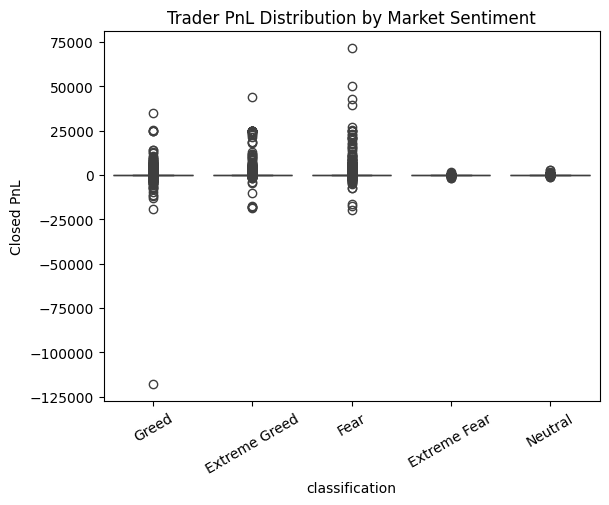

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.boxplot(
    data=analysis_df,
    x='classification',
    y='Closed PnL'
)
plt.title("Trader PnL Distribution by Market Sentiment")
plt.xticks(rotation=30)
plt.show()

## Trade Size & Risk Behavior

This analysis examines whether higher profitability is driven by:
- Larger capital exposure
- Or market conditions and timing

Average and median trade sizes are compared across sentiment regimes.

In [24]:
size_by_sentiment = analysis_df.groupby('classification')['Size USD'].agg(
    avg_size='mean',
    median_size='median'
).sort_values('avg_size', ascending=False)

size_by_sentiment

,avg_size,median_size
classification,,
Fear,5744.782685,703.88
Greed,5051.878829,675.08
Neutral,4332.202906,411.81
Extreme Fear,4118.761840,599.12
Extreme Greed,3242.085086,365.00


## Insight: Capital Deployment vs Profitability

- Traders deploy the largest average capital during Fear.
- Extreme Greed has the smallest average trade size despite the highest profitability.

This suggests that profits in Extreme Greed are driven by market momentum and volatility rather than increased risk-taking through larger positions.


In [25]:
side_sentiment_pnl = analysis_df.groupby(
    ['classification', 'Side']
)['Closed PnL'].mean().unstack()

side_sentiment_pnl

Side,BUY,SELL
classification,,
Extreme Fear,-3.248825,7.076480
Extreme Greed,9.047055,288.350131
Fear,210.426466,36.824047
Greed,15.661324,89.201657
Neutral,12.484274,35.669805


## Directional Behavior: BUY vs SELL

This section analyzes how trade direction (BUY or SELL) performs under different sentiment conditions to identify contrarian or momentum-based behavior.


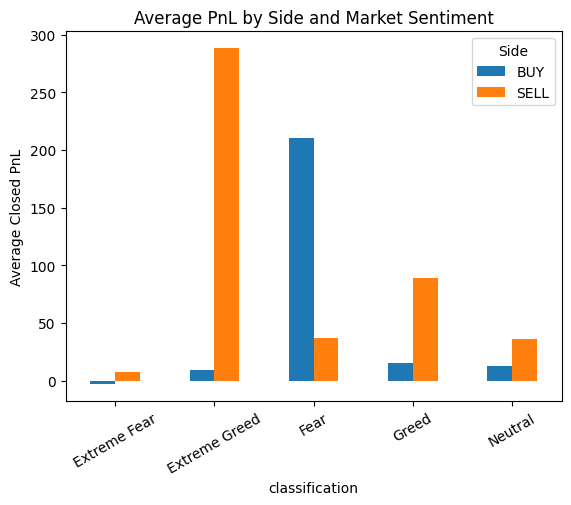

In [26]:
side_sentiment_pnl.plot(kind='bar')
plt.title("Average PnL by Side and Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.xticks(rotation=30)
plt.show()

## Final Conclusions

- Trader profitability peaks during Greed and Extreme Greed phases.
- Win rates are highest in optimistic market conditions.
- Fear markets reward contrarian BUY strategies.
- Greed and Extreme Greed favor SELL strategies, indicating profit-taking and short-side dominance.
- Market sentiment significantly influences trader behavior, risk exposure, and execution decisions.

These findings highlight the importance of incorporating sentiment-aware logic into trading strategy design.
